# Normal Distribution

This notebook contains my investigation of normal distribution as part of the Fundamentals of Data Assessment module of the Higher Diploma in Computing and Data Analytics at ATU.

## Table of Contents
1. [Introduction](#introduction)
2. [Significance & Application of the Normal Distribution](#significance_application)
3. [Characteristics of the Normal Distribution](#characteristics)
3. [The Empirical Rule](#empirical)
5. [Normality Tests](#tests)
6. [Limitations of a Bell Curve and Alternative Distributions](#limitations)
6. [Summary](#summary)

## 1. Introduction <a class="anchor" id="introduction"></a>

In my research for this assignment two things became apparent to me.  Firstly, the normal distribution is quite literally ubiquitous; both in the world around us and in every manner of social, economic and statistical modelling.  It can be used to describe any number of phenomenon because so many things in the world around us emerge as the sum of smaller independent parts; human height, newborn birth weight and IQ are some examples of normal distributions.  My second realisation was that there is potentially a PhD in any one aspect of the normal distribution!  For the purposes of this assignment though, I have been asked to approach the subject as though explaining it to my fellow students so I'll proceed on that basis.  I have, however, included a self-indulgent tangent questioning the application of the normal distribution and why some real-life scenarios are better represented by a Pareto distribution and the implications of that. 

In order to run the code throughout this notebook, I will first load the necessary Python libraries. 

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import math
from scipy.stats import norm   
from scipy import stats
from scipy.stats import lognorm
from scipy.stats import pareto
from scipy.stats import shapiro
import statsmodels.api as sm

## 2. Significance and Application of the Normal Distribution <a class="anchor" id="significance_application"></a>

Normal distribution is considered one of the most important probability distributions in statistics because it accurately describes the distribution of values for many real-world, natural phenomena, prime examples being height, weight, shoe size, IQ and life expectancy in a population. Fundamental to understanding the importance of the normal distribution is the the Central Limit Theorem (CLT) which states that if you take a large number of samples (>=30) from any distribution and analyse some statistics from that group of samples, you will eventually get a normal distribution for that distribution.  Physical quantities that are themselves the sum of numerous indpendent processes will generally have distributions that approximate normal.  

A normal distribution can take on any value as its mean and standard deviation. The standard normal distribution is a specific instance of the normal distribution that has a mean of ‘0’ and a standard deviation of ‘1’. Standardising a normal distribution allows for easy calculation of the probability of certain values occurring in a distribution and to compare data sets which otherwise would have different means and standard deviations.

## 3. Characteristics of the Normal Distribution <a class="anchor" id="characteristics"></a>

$ \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}\right) $

The above is the normal probability density formula to calculate probability where:</br>
x = value of the variable</br>
μ = mean</br>
σ = standard deviation</br>
σ2 = variance</br>
For any value of x, you can apply the mean and standard deviation to the formula to find the probability density of the variable taking on that value of x.

The normal distribution was first described in 1809 by Carl Gauss in the context of measurement errors in astronomy.  Since then it has been used and applied extensively in relation to probability, statistics and machine learning.  It is the default probability for many real-world scenarios and is widely used because many phenomena found in nature fall into this predictable pattern and can be effectively modeled by relatively simple functions.  

Normal distributions share the following characteristics:

* **the mean, median and mode are equal**
The mean is the numerical average of a data set, the mode is the value that appears most frequently and the median is the middle number.  In a normal distribution the top of the curve represents all three of these values and they are equal. The mean is often represented by the greek lower case letter µ (mu). The mean is the central tendency of the normal distribution and it defines the location of the peak for the bell curve around which all other values are clustered. </br>

* **it is symmetrical**
A normal distribution has a distinctive symmetrical bell shape and is often called a bell curve for this reason.  This curve can be divided in the middle to produce two equal and symmetrical halves; the right side of the center is a mirror image of the left side.</br>

* **it is unimodal**
There is only one mode, or peak, in a normal distribution. </br>

* **it is asymptotic**
Normal distributions are continuous and have tails that are asymptotic. Continuous variables, as opposed to discrete variables which have finite values, can take on an unlimited number of values between the lowest and highest points of measurement.  Asymptotic means that the tails of the distribution never intersect with the X axis.</br>

<left>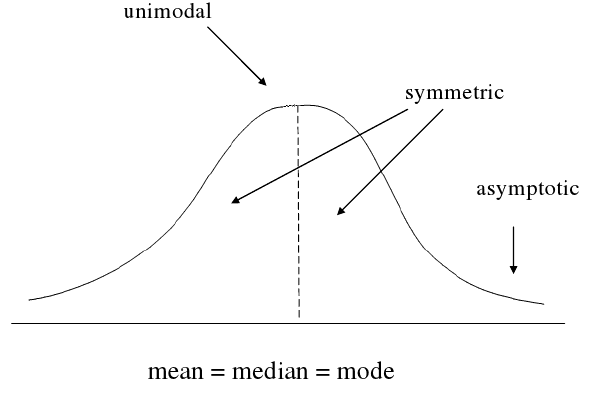</left>



### Standard Deviation
The standard deviation is a measure of the amount of variation or dispersion of a set of values, or in simpler terms the spread of the data from the mean. The lower the standard deviation, the closer to the mean the values tend to be and higher  indicates that the values are more spread out from the mean. It is most commonly represented in equations as the lower case Greek letter σ (sigma). 

Aside from forming an integral part of the equation for a normal distribution, why is the standard deviation so significant?  One [example](https://www.statology.org/why-is-standard-deviation-important/) which I read about explained it well in real world terms, where the mean can be the same but the standard deviation is the key to greater insight into the data.  

Suppose the mean salary at company A is €80,000 and the standard deviation is €20,000. Since the standard deviation is so large, there’s no guarantee that you will get paid the mean salary of €80,000 per year as there is such a wide variation in salaries.

At company B, which has the same mean salary of €80,000 the standard deviation is only €4,000, representing less spread in salaries, you are far more likely to be paid a salary closer to the mean because of this lower variation. The below graph illustrates the difference the standard deviation makes in this scenario. 

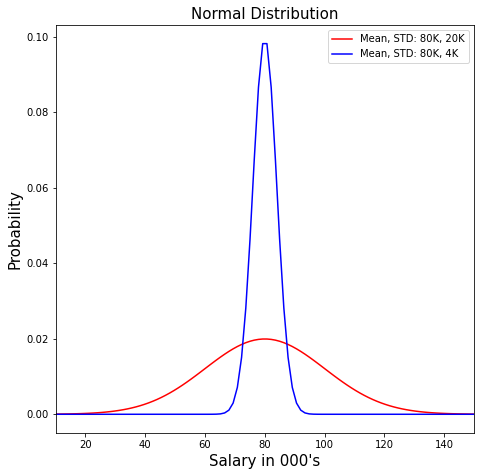

In [2]:
# Values of random variable

x = np.linspace(10, 150, 100)
plt.figure(figsize=(7.5,7.5))

plt.plot(x, stats.norm(80, 20).pdf(x), color='r', label='Mean, STD: 80K, 20K')
plt.plot(x, stats.norm(80, 4).pdf(x), color='b', label='Mean, STD: 80K, 4K')

plt.xlim(10, 150)
plt.title('Normal Distribution', fontsize='15')
plt.xlabel("Salary in 000's", fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.legend()
plt.show()

### Modelling a Simple Probability Distribution

Below is the code for a simple probability distribution plot representing standard normal distribution with a mean of 0 and a standard deviation of 1 in the range of -4 to 4. It illustrates the classic bell curve shape. 

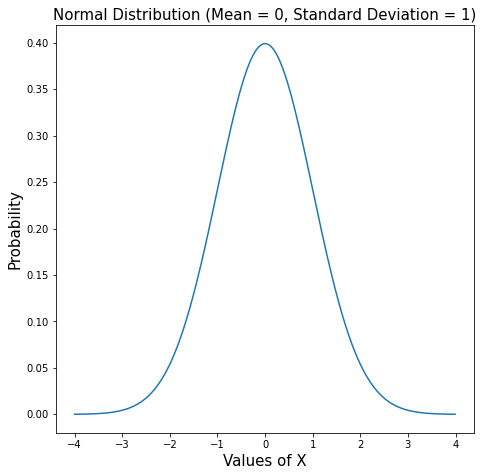

In [3]:
# Create a normal distribution with mean 0 and standard deviation 1

# Plot between -4 and 4 with .01 steps
x_axis = np.arange(-4, 4, .01)

plt.figure(figsize=(7.5, 7.5))

# Mean = 0, SD = 1
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.title('Normal Distribution (Mean = 0, Standard Deviation = 1)', fontsize='15')
plt.xlabel('Values of X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()


I found the below simple [code](https://vitalflux.com/normal-distribution-explained-python-examples/) gave a great visual to demonstrate  how the shape of the curve varies depending on the mean and standard deviations when plotting multiple normal distributions.  Clearly the higher the standard deviation, the shallower the resultant curve.

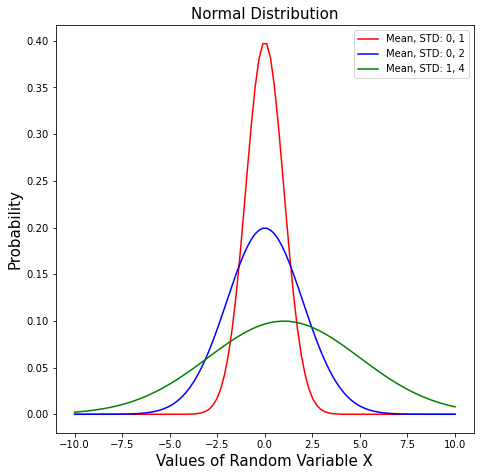

In [4]:
# Values of random variable

x = np.linspace(-10, 10, 100)
plt.figure(figsize=(7.5,7.5))

plt.plot(x, stats.norm(0, 1).pdf(x), color='r', label='Mean, STD: 0, 1')
plt.plot(x, stats.norm(0, 2).pdf(x), color='b', label='Mean, STD: 0, 2')
plt.plot(x, stats.norm(1, 4).pdf(x), color='g', label='Mean, STD: 1, 4')

plt.xlim(-11, 11)
plt.title('Normal Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.legend()
plt.show()

### Coding a Real Example

To illustrate a simple example of calculating probabilities from normal distribution I'll use the average IQ in Ireland which is 100 with a standard deviation of 15, generate a random data set of 1000 values and plot this into a histogram with a standard deviation line plotted over it, illustrating how it takes on the classic shape of a bell curve. 

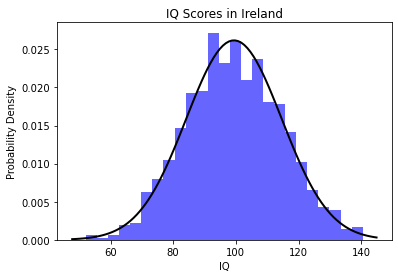

In [5]:
# code taken from and modified - https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/ 

# Generating random data set for IQs with 1000 values
data = np.random.normal(100, 15, 1000)
  
# Plotting the histogram
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

#fitting a normal distribution to the data set
mu, std = norm.fit(data) 

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title("IQ Scores in Ireland")
plt.xlabel('IQ')
plt.ylabel('Probability Density')
  
plt.show()


## 4. The Empirical Rule <a class="anchor" id="empirical"></a>

The empirical rule states that in a normal distribution, almost all observed data will fall within three standard deviations of the mean.  Specifically that 68% of observations fall within the first standard deviation, 95% within the first two standard deviations and 99.7% within the first three standard deviations which is why it is also sometimes referred to as the (less catchy!) 68-95-99.7 rule or the three-sigma rule. 

The empirical rule is useful to help determine outcomes where not all the data is available and is usefully applied to test how normal a data set is. 

<left>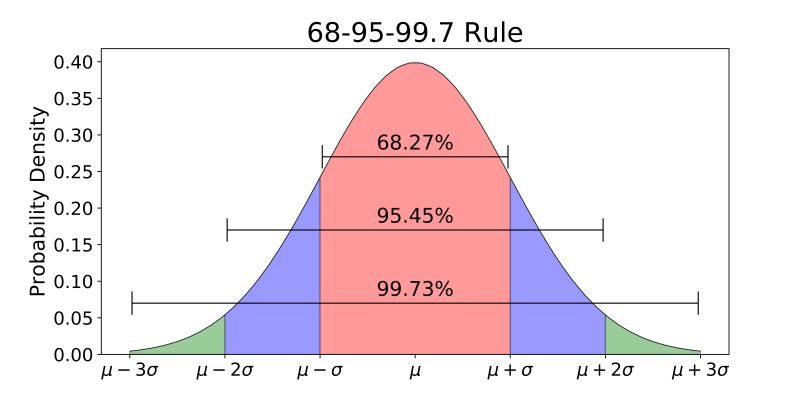</left>

In [6]:
# code to show the values between the standard deviations
# setting the values of my mean and standard deviation 
mean = 0
SD = 1

# demonstrating the value of cdf between one, two and three standard deviations around the mean
one_sd = norm.cdf(SD, mean, SD) - norm.cdf(-SD, mean, SD)
two_sd = norm.cdf(2 * SD, mean, SD) - norm.cdf(-2 * SD, mean, SD)
three_sd = norm.cdf(3 * SD, mean, SD) - norm.cdf(-3 * SD, mean, SD)

# printing the value of fractions within each band
print("Values within one standard deviation =", one_sd)
print("Values within two standard deviations =", two_sd)
print("Values within three standard deviations =", three_sd)


Values within one standard deviation = 0.6826894921370859
Values within two standard deviations = 0.9544997361036416
Values within three standard deviations = 0.9973002039367398


I'd like to show the standard deviation lines on my plot of IQ data so I'm going to use instead a kernel density estimate (KDE) plot.  A KDE is analogous to a histogram but represents the data using a continuous probability density curve.

Onto this I will map one standard deviation to either side of the mean and then check what values fall within one standard deviation either side of the mean (68%).  

<AxesSubplot:ylabel='Density'>

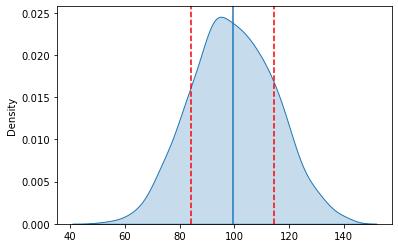

In [7]:
data_mean = data.mean()
data_std = data.std()

plt.axvline(data_mean)
plt.axvline(data_mean - data_std, ls="--", color = "r")
plt.axvline(data_mean + data_std, ls="--", color = "r")
sns.kdeplot((data), fill=True)


In [8]:
norm.interval(0.68, loc = 100, scale = 15)

(85.0831317518537, 114.9168682481463)

This shows us that 68% of the population have an IQ between 85 and 115, representing on standard deviation (15) either side of the mean (100), corroborating the empirical rule. 

### 4.1 The Cumulative Distribution Function

The cumulative distribution function (CDF) describes the probability of a random variable taking on a given value.  It allow us to make predictions about values in our dataset. For the purposes of illustrating the use of the CDF and using the normal distribution, I can use my IQ data from above and apply the CDF to calculate what percentage of the population has an IQ of 130 or higher.  We can use the cdf() function of the scipy.stats.norm module to calculate the cumulative probability. The code below first calculates the cumulative probability value from -∞ to 130 and we then subtract that figure from 1 (because this is the total value of the area under the curve). The resulting remainder represents the % of population that has an IQ of 130 or higher or as the calculation shows, approximately 2.28% of the population.  If we didn't subtract it would return the cumulative value or % of population with an IQ up to 130. 

In [9]:
cdf_value = norm(loc = 100 , scale = 15).cdf(130)
prob = 1 - cdf_value
print("Population with IQ >130 =", prob)


Population with IQ >130 = 0.02275013194817921


### 4.2 The Quantile Function
The quantile function of a distribution is the inverse of the CDF.  For example if we wanted to find out what was the average IQ of 80% of the population we could use the quantile function of numpy to calculate this value.

In [10]:
# using my existing IQ data array, and applying the % value we established using the CDF function 
np.quantile(data, .80, axis = 0)

112.89450562919126

## 5. Normality Tests <a class="anchor" id="tests"></a>

Normality tests are used to assess whether a given data set comes from a normal distribution.  There have been many such tests devised for this purpose (>40).  An informal approach to testing normality is to compare a histogram of the sample data to a normal probability curve, as I did above with my IQ data set. The histogram should be bell-shaped and resemble the normal distribution, although where a sample is small the curve may not be indicative enough.  Another commonly applied graphical method is a quantile-quantile plot (QQ plot) of the standardized data against the standard normal distribution where the correlation between the sample data and normal quantiles (a measure of the goodness of fit) measures how well the data are modeled by a normal distribution. If the points plotted in the QQ plot fall approximately on a straight line it indicates high positive correlation and normal data. The benefit of these plots is that they are visually easy to interpret, if a bit subjective, and outliers are easily identified.

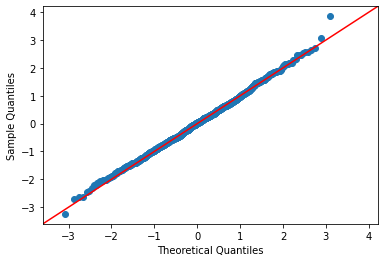

In [11]:
# Illustrate a sample Q-Q Plot
# code modified from https://www.statology.org/q-q-plot-python/

# create dataset with 1000 values that follow a normal distribution
np.random.seed(42)
data = np.random.normal(0, 1, 1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data, line='45')
plt.show()

Goodness-of-fit tests are statistical hypothesis tests used to see how closely observed data mirrors expected data and are used to establish whether a sample follows a normal distribution, if categorical variables are related, or if random samples are from the same distribution.  There are many examples of such tests including: 
* Shapiro–Wilk test
* D'Agostino's K-squared test
* Jarque–Bera test
* Anderson–Darling test
* Cramér–von Mises criterion
* Kolmogorov–Smirnov test
* Lilliefors test 
* Pearson's chi-squared test

It would seem that the Shapiro-Wilk is one of the more popular and widely used of these types of test as it has more power to detect any non-normality.  The test is applied to a sample and the null hypothesis is that the sample has been generated from a normal distribution. If the probability value (P value) is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution.  The disadvantage of Shapiro-Wilk is that it doesn’t work well with large datasets. Maximum size depends on the implementation, but in Python a sample size larger than 5000 may return a warning that the resulting p-value is an approximation.  For a normal distribution we would we expect a Shapiro-Wilk test to return a large p-value for a 'normal' sample. P > 0.05 is the probability that the null hypothesis is true, representing a normal distribution. 

In [12]:
# Practical example of a Shapiro-Wilk test
# code modified from https://towardsdatascience.com/a-practical-introduction-to-the-shapiro-wilk-test-for-normality-5675e52cee8f

# perform the test on a random normally distributed dataset, noting P-value output is >0.05
shapiro(np.random.normal(size=500))

ShapiroResult(statistic=0.9972553849220276, pvalue=0.5761024355888367)

A further test for normality in a distribution is Bayesian analysis. This is a much more complex approach which yields similar results to a Shapiro-Wilk test with the benefit of working better on larger samples.  

## 6. Limitations of a Bell Curve and Alternative Distributions <a class="anchor" id="limitations"></a>

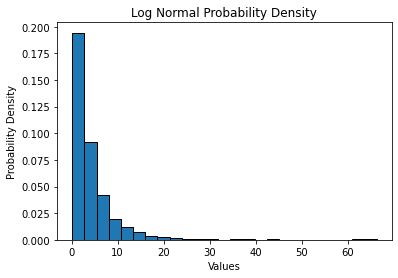

In [13]:
# plotting a sample log normal distribution

#generate log-normal distributed random variable with 1000 values >0
lognorm_values = lognorm.rvs(s=1, scale=math.exp(1), size=1000) # math.exp() for mean for the log-normal distribution

plt.hist(lognorm_values, density=True, bins = 25, edgecolor='black')
plt.title("Log Normal Probability Density")
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.show()

This interesting [article](https://hbr.org/2022/01/we-need-to-let-go-of-the-bell-curve) from the Harvard Business Review gives an alternative perspective on the relevance and accuracy of the pervasive use of the bell curve, such that I felt it warranted mentioning.  One statement in it leapt out at me:

> _"...when Bill Gates walks into a bar, everyone in that bar becomes a millionaire on average"_

Reflecting on this statement, the suggestion is that outliers can be very impactful and also that sometimes the median is a better representative midpoint of data than the mean. 

The author further suggests that - while a Gaussian world, with most people clustered around a stable average may feel fair and predictable and we may find symmetry pleasing in all things; faces, art and/or statistics - in fact most human activities and many disciplines from physics and biology to linguistics, finance, and computer science, actually follow a Pareto distribution instead of a “normal” Gaussian curve.  

The namesake of this distribution is economist Vilfredo Pareto who, in the early 20th century observed that 20% of people in Italy owned 80% of the land and that 80% of peas procured from his garden came from 20% of its pea plants.  A more recent example is that 82.7% of the world’s income is controlled by 20% of the population.

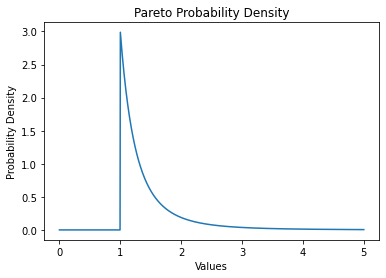

In [14]:
# plot a pareto distribution
# code taken from https://stackoverflow.com/questions/42260519/defining-pareto-distribution-in-python-scipy

x = np.linspace(0, 5, 1000)

output = np.array(pareto.pdf(x, scale = 1, b = 3)) # where b signifies shape parameter
plt.plot(x, output.T)
plt.title("Pareto Probability Density")
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.show()

Instead of a symmetric bell curve, the distribution of observations or outcomes in a Pareto distribution looks like a hockey stick with a long tail. There are many observations of low values, and a small number of high values, or outliers.   And much like the example of Bill Gates walking into a bar, one small change in one variable is associated with a large change in another, because it reflects variables multiplied with each other rather than added to each other (as in the normal distribution). This is referred to as a “power law.”  The power law states that a relative change in one quantity results in a proportional relative change in another.  Most things follow power laws because this is how interconnected complex systems behave. Power laws are becoming increasingly prevalent (and relevant) because of the globalisation of, well, everything!  Thanks to advances in information technology and transport infrastructures, supply chains, markets and economies themselves have become ever more enmeshed and co-dependent and the more interconnected complex systems are, the more pronounced the power law.  

> _In such instances variables are not additive but instead influence each other, creating cascading processes that are nonlinear, multiplicative, and far less predictable._

The suggestion that we live in a largely Pareto world that is inherently unfair, asymmetric, and unpredictable is about as unappealing as the stability of a normal distribution is appealing.   The flipside is the suggestion that targeted measures in the right place can trigger systemic change faster and more easily. In a Gaussian world, all elements within a system must shift for the entire construction to change, which is laborious, time consuming, and often impossible. 

> _In a Pareto world, on the other hand, a change in the tail shifts the entire system — for better or worse._

The same article goes on to say that these intertwined and globalised systems are capable of “black swan” behaviour because in most Pareto distributions (unlike in Gaussian ones), the variance — which measures how dispersed the data points are around the mean in a distribution — is not well defined.  Black swans were thought once to not exist, only white, until they were discovered in Australia by Dutch explorers. The lesson being that unlikely events are nonetheless possible and all the more surprising when they occur. Nassim Taleb’s book ‘Black Swan’ looks at statistics, probability, and how we often erroneously use both to estimate the likelihood of real-life events, that the prediction models which we often depend upon are too narrow.   His hypothesis is that a Black Swan event, if it’s unpredictable, it is not because it’s random but because our outlook on what is possible/likely was too narrow in the first place.   Examples of recent ‘Black Swan’ events are the 9/11 attacks, the 2008 financial crisis and the Covid-19 pandemic – as is clear from these examples Black Swans often affect entire societies, or even the whole world.    One school of thought would suggest that it’s impossible to predict a Black Swan event because that’s the very nature of the beast (pardon the pun); the one thing that nobody could have possibly forecast or unexpected.  Others would argue that while a black swan event is a surprise for some, it is not for others; it’s a subjective, knowledge-dependent notion and its possible that warnings about the event may have been ignored because of strong personal or organisational resistance to changing beliefs and procedures.  Maybe we shouldn’t ignore the outliers!

## 7. Summary <a class="anchor" id="summary"></a>
Maths, economics and Python programming can be as complicated as you want or need them to be but, at the end of the day, simple predictive models are usually the most widely used. They can be easily understood and explained and, in real-world situations which call for data analysis, offer extremely useful insights into data.  The normal distribution is itself simple and accessible which is why it is so widely used.  However it is important to really examine the data/variables to ensure that it is fit for purpose and have a considered view of what you hope to achieve such that the correct distribution is applied to generate insightful and meaningful analytics. 

### References

https://www.investopedia.com/terms/n/normaldistribution.asp#:~:text=Normal%20distribution%2C%20also%20known%20as,data%20far%20from%20the%20mean - visited 03/10/2022

McLeod, S. A. (2019, May 28). Introduction to the normal distribution (bell curve). Simply psychology: https://www.simplypsychology.org/normal-distribution.html visited 03/10/2022

https://vitalflux.com/normal-distribution-explained-python-examples/ - visited 12/10/2022

https://ekamperi.github.io/mathematics/2021/01/29/why-is-normal-distribution-so-ubiquitous.html - visited 06/12/2022

https://www.askpython.com/python/normal-distribution - visited 12/10/2022

Video: https://www.youtube.com/watch?v=HfHOanDNWbg The normal distribution in Python, pysce, John Kitchin - viewed 24/10/2022

Article on The Normal Distribution, published in The Chemometrics Column 25 June 2014, author Richard G. Brereton https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/pdf/10.1002/cem.2655#:~:text=The%20normal%20(or%20Gaussian)%20distribution,of%20applied%20probability%20and%20statistics - visited 24/10/2022

https://www.quora.com/Why-is-the-normal-distribution-important - visited 25/10/2022

https://study.com/academy/lesson/normal-distribution-of-data-examples-definition-characteristics.html#:~:text=Characteristics%20of%20Normal%20Distribution&text=Normal%20distributions%20are%20symmetric%2C%20unimodal,image%20of%20the%20left%20side - visited 25/10/2022

https://www.investopedia.com/terms/c/central_limit_theorem.asp visited 25/10/2022

https://en.wikipedia.org/wiki/Central_limit_theorem - visited 06/11/2022

https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/ - visited 06/11/2022

https://www.investopedia.com/terms/e/empirical-rule.asp#:~:text=Key%20Takeaways,standard%20deviations%20from%20the%20mean. - visited 06/11/2022

https://builtin.com/data-science/empirical-rule - visited 06/11/2022

video: Python Statistics - Normal Distribution and Probability Functions by Absent Data https://youtu.be/WWTf5J5NDfQ - visited 11/11/2022

We need to let go of the Bell Curve - https://hbr.org/2022/01/we-need-to-let-go-of-the-bell-curve - visited 15/11/2022

Plotting a Pareto distribution - https://towardsdatascience.com/generating-pareto-distribution-in-python-2c2f77f70dbf - visited 18/11/2022

Log normal distribution - https://towardsdatascience.com/log-normal-distribution-a-simple-explanation-7605864fb67c - visited 18/11/2022

Why is the standard deviation important - https://www.statology.org/why-is-standard-deviation-important/ visited 23/11/2022

Normality Test - https://en.wikipedia.org/wiki/Normality_test - visited 23/12/2022

Numpy Quantiles - https://numpy.org/devdocs/reference/generated/numpy.quantile.html - visited 27/12/2022